In [2]:
import numpy as np
import librosa as lb
import noisereduce as nr
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from scipy import linalg

/home/alvaromontero/anaconda3/envs/voice_rec/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def lpc_coefficients(signal, order):
    # Autocorrelación
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr[len(autocorr) // 2:]

    # Matriz de Toeplitz de autocorrelación
    R = linalg.toeplitz(autocorr[:order])

    # Resolver las ecuaciones de Yule-Walker
    r = autocorr[1:order + 1]
    lpc_coeffs = np.linalg.solve(R, r)
    
    # Los coeficientes LPC incluyen el coeficiente inicial (1)
    return np.concatenate(([1], -lpc_coeffs))

## Preprocesamiento

In [4]:
audio_path = '/mnt/d/Repositorios/Voice_recognition/Victorjoel.wav'
signal, sample_rate = lb.load(audio_path, sr=None)

In [5]:

# Normalizar el audio
normalized_signal = signal / np.max(np.abs(signal))

In [6]:
reduced_noise_signal = nr.reduce_noise(y=normalized_signal, sr=sample_rate)

In [7]:
order = 16  # El orden típico suele estar entre 8 y 16
lpc_coeffs = lpc_coefficients(reduced_noise_signal, order)

In [8]:
print("Coeficientes LPC:", lpc_coeffs)

Coeficientes LPC: [  1.          -6.23551798  17.63364792 -32.35469437  41.72516632
 -36.36168289  14.95785332  13.01678276 -31.09314728  28.02467155
  -5.87447643 -21.37681389  38.15918732 -38.11687088  25.76865768
 -11.6796875    2.81597805]


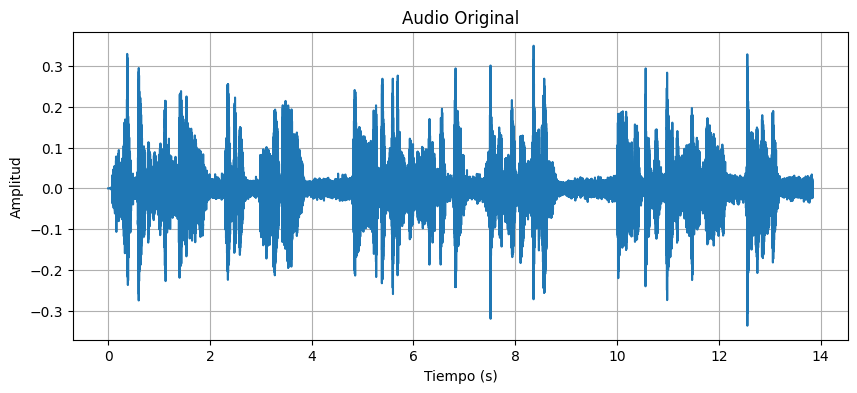

In [9]:
plt.figure(figsize=(10, 4))
time = np.linspace(0, len(signal) / sample_rate, num=len(signal))
plt.plot(time, signal)
plt.title('Audio Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

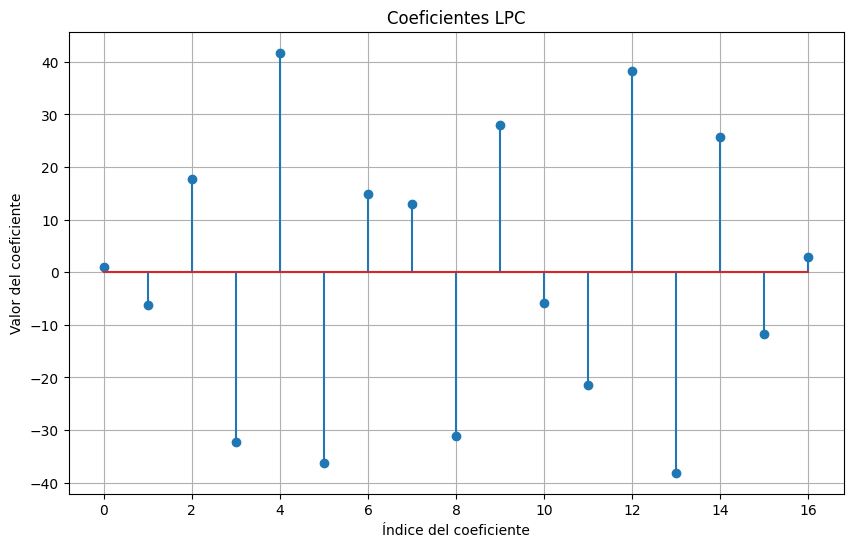

In [10]:
plt.figure(figsize=(10, 6))
plt.stem(lpc_coeffs)
plt.title('Coeficientes LPC')
plt.xlabel('Índice del coeficiente')
plt.ylabel('Valor del coeficiente')
plt.grid(True)
plt.show()

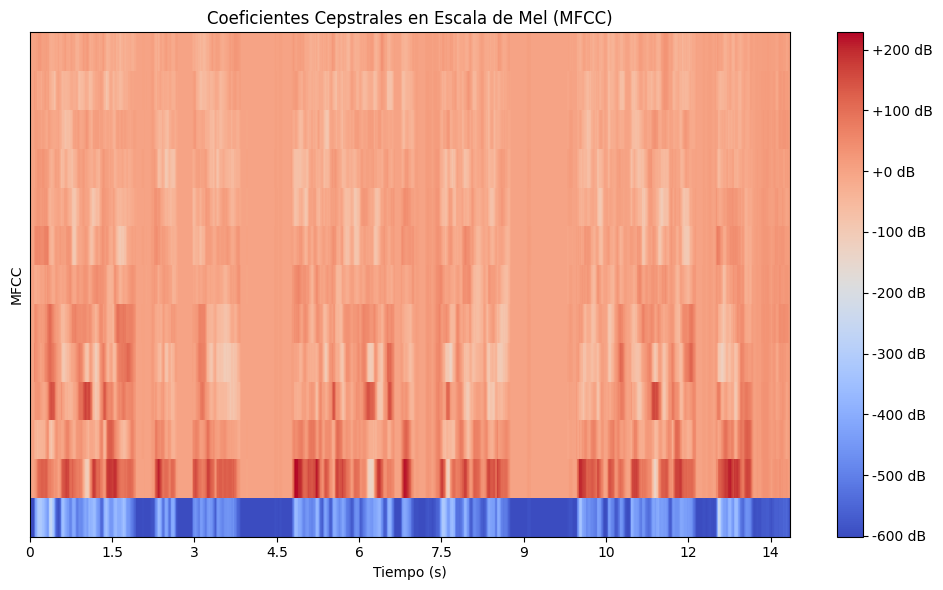

In [11]:
mfccs = lb.feature.mfcc(y=reduced_noise_signal, sr=sample_rate, n_mfcc=13)  # Comúnmente se usan 13 MFCC

# Graficar los MFCC
plt.figure(figsize=(10, 6))
lb.display.specshow(mfccs, x_axis='time', sr=sample_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Coeficientes Cepstrales en Escala de Mel (MFCC)')
plt.xlabel('Tiempo (s)')
plt.ylabel('MFCC')
plt.tight_layout()
plt.show()

In [15]:
for mel in mfccs:
    print(str(mel)+str(len(mel)))

[-601.5672  -601.5672  -601.5672  ... -567.89264 -576.9507  -590.2041 ]1299
[ 0.        0.        0.       ... 17.136967 14.657915 10.490202]1299
[ 0.         0.         0.        ...  7.29056   10.188528   9.6884575]1299
[ 0.        0.        0.       ... 14.002975 19.412777 14.045519]1299
[ 0.        0.        0.       ... 15.816241 16.262533 10.202474]1299
[ 0.        0.        0.       ... 29.205538 19.93578   9.322715]1299
[ 0.        0.        0.       ... 19.042168 16.970676 11.619265]1299
[ 0.        0.        0.       ... 12.112745 12.152472  8.293411]1299
[0.        0.        0.        ... 2.376374  6.1503096 6.1836853]1299
[ 0.         0.         0.        ... 11.326372  12.616739   8.9352455]1299
[ 0.         0.         0.        ... 20.62894   14.861446   6.3789277]1299
[ 0.         0.         0.        ... 10.386668   8.00553    3.1364205]1299
[0.        0.        0.        ... 5.3740835 8.860356  6.1303983]1299
